In [65]:
limited = False
limite_tweets = 3000

Btw_activado = True
sacar_ccomponents = True


# Librerías

In [66]:
import networkx as nx
import requests
import json
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import winsound
from markdown import markdown
import random

from networkx.algorithms.community import girvan_newman
from itertools import islice
import tkinter as tk
from tkinter import ttk, messagebox
import customtkinter as ctk
import itertools

import threading
import time

import tkinter.ttk as ttk
from PIL import ImageTk, Image
import io

from wordcloud import WordCloud
from IPython.display import clear_output, display


from tkinter import scrolledtext

import seaborn as sns
import re
from geopy.geocoders import Nominatim
import geopandas as gpd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Funciones para usar la API
eliminar_grafo(Grafo)\
importar_grafo(Grafo)\
\
importar_nodos(nodos)\
eliminar_nodos(nodos)\
\
add_node_attributes(node_list, attribute_name, values)\
update_node_attributes(node_list, attribute_name, values)\

In [67]:
# URL del servidor de streaming de Gephi
url = "http://localhost:8080/espacio?operation=updateGraph"




def convert_graph_to_gephi_json(graph):
    nodes = {"an": {}}
    edges = {"ae": {}}

    for node, data in graph.nodes(data=True):
        node_data = {k: v for k, v in data.items() if k not in ['x', 'y', 'z', 'r', 'g', 'b']}
        if 'color' in node_data:
            node_data['color'] = node_data['color'] if node_data['color'].startswith('#') else f"#{node_data['color']}"
        node_data['label'] = data.get('label', node)
        nodes["an"][node] = node_data

    for i, (source, target, data) in enumerate(graph.edges(data=True)):
        edge_id = f"e{i}"
        edge_data = {"source": source, "target": target}
        edge_data.update(data)
        edges["ae"][edge_id] = edge_data

    return nodes, edges

def send_data_to_gephi(url, data):
    headers = {'Content-Type': 'application/json'}
    response = requests.post(url, headers=headers, data=json.dumps(data))
    if response.status_code == 200:
        print("Datos enviados correctamente")
    else:
        print(f"Error al enviar datos: {response.status_code} - {response.text}")


############################ ELIMINAR GRAFO ############################
############################ ELIMINAR GRAFO ############################
############################ ELIMINAR GRAFO ############################
def eliminar_grafo(Grafo):
    func_eliminar = {"dn": {}}
    for nodo, data in Grafo.nodes(data=True):
        func_eliminar["dn"][nodo] = data

    response = requests.post(url, data=json.dumps(func_eliminar), headers={"Content-Type": "application/json"})
    if response.status_code == 200:
        print("Nodos eliminados correctamente")
    else:
        print(f"Error al eliminar los nodos: {response.status_code}, {response.text}")


############################ ELIMINAR NODOS ############################
############################ ELIMINAR NODOS ############################
############################ ELIMINAR NODOS ############################
def eliminar_nodos(nodos):

    func_eliminar = {"dn": {}}
    
    for nodo in nodos:
        # Añadir el nodo al payload
        func_eliminar["dn"][nodo] = {}


    response = requests.post(url, data=json.dumps(func_eliminar), headers={"Content-Type": "application/json"})
    if response.status_code == 200:
        print("Nodos eliminados correctamente")
    else:
        print(f"Error al eliminar los nodos: {response.status_code}, {response.text}")

############################ ELIMINAR ENLACES ############################
############################ ELIMINAR ENLACES ############################
############################ ELIMINAR ENLACES ############################
def eliminar_enlaces(lista_enlaces):

    func_eliminar = {"dn": {}}
    
    for enlace in lista_enlaces:
        # Añadir el nodo al payload
        func_eliminar["de"][nodo] = {}


    response = requests.post(url, data=json.dumps(func_eliminar), headers={"Content-Type": "application/json"})
    if response.status_code == 200:
        print("Nodos eliminados correctamente")
    else:
        print(f"Error al eliminar los nodos: {response.status_code}, {response.text}")

############################ IMPORTAR GRAFO ############################
############################ IMPORTAR GRAFO ############################
############################ IMPORTAR GRAFO ############################
def importar_grafo(Grafo):
    # Convertir el grafo y enviar los nodos
    nodes, edges = convert_graph_to_gephi_json(Grafo)
    print('Nodos:')
    send_data_to_gephi(url, nodes)
    # Enviar las aristas
    print('Aristas:')
    send_data_to_gephi(url, edges)


############################ IMPORTAR NODOS ############################
############################ IMPORTAR NODOS ############################
############################ IMPORTAR NODOS ############################
def importar_nodos(nodos):

    func_eliminar = {"an": {}}
    
    for nodo in nodos:
        # Añadir el nodo al payload
        func_eliminar["an"][nodo] = {}


    response = requests.post(url, data=json.dumps(func_eliminar), headers={"Content-Type": "application/json"})
    if response.status_code == 200:
        print("Nodos eliminados correctamente")
    else:
        print(f"Error al eliminar los nodos: {response.status_code}, {response.text}")


############################ IMPORTAR ENLACES ############################
############################ IMPORTAR ENLACES ############################
############################ IMPORTAR ENLACES ############################
def importar_enlaces(nodos):

    func_eliminar = {"ae": {}}
    
    for nodo in nodos:
        # Añadir el nodo al payload
        func_eliminar["dn"][nodo] = {}


    response = requests.post(url, data=json.dumps(func_eliminar), headers={"Content-Type": "application/json"})
    if response.status_code == 200:
        print("Nodos eliminados correctamente")
    else:
        print(f"Error al eliminar los nodos: {response.status_code}, {response.text}")




############################ OBTENER GRAFO ################################
############################ OBTENER GRAFO ################################
############################ OBTENER GRAFO ################################
url_obtener_grafo = "http://localhost:8080/espacio?operation=getGraph"

def recibir_grafo():
    """
    Función para recibir un grafo desde una URL y convertirlo en un objeto NetworkX.

    Parámetros:
    url (str): URL que devuelve los datos del grafo en formato JSON.

    Retorna:
    nx.DiGraph: Un grafo dirigido de NetworkX con los nodos y aristas recibidos.
    """
    G = nx.DiGraph()  # Usa nx.Graph() si tu grafo no es dirigido

    try:
        # Realizar la solicitud GET para obtener los nodos con un tiempo de espera aumentado
        response = requests.get(url_obtener_grafo, stream=True, timeout=5)
        
        # Verificar el estado de la respuesta
        if response.status_code == 200:
            buffer = ""
            # Procesar cada bloque de la respuesta
            for chunk in response.iter_content(chunk_size=1):
                # Decodificar el bloque como texto y añadir al buffer
                buffer += chunk.decode('utf-8')
                
                # Separar las líneas completas
                while "\n" in buffer:
                    line, buffer = buffer.split("\n", 1)
                    if line.strip():  # Verifica que la línea no esté vacía
                        # Decodificar la línea como JSON
                        json_data = json.loads(line)
                        print('Linea', json_data)
                        # Procesar el nodo
                        if 'an' in json_data:
                            for node, attributes in json_data['an'].items():
                                # Filtrar atributos no deseados
                                filtered_attributes = {k: v for k, v in attributes.items() if k not in ['x', 'y', 'z', 'r', 'g', 'b']}
                                
                                # Agregar el nodo al grafo con sus atributos
                                G.add_node(node, **filtered_attributes)
                        
                        # Procesar la arista (enlace)
                        elif 'ae' in json_data:
                            for edge, attributes in json_data['ae'].items():
                                # Extraer los atributos relevantes de la arista
                                source = attributes['source']
                                target = attributes['target']
                                weight = attributes.get('weight', 1)
                                
                                # Agregar la arista al grafo con sus atributos
                                G.add_edge(source, target, weight=weight)
            
            # Procesar cualquier línea restante en el buffer
            if buffer.strip():
                json_data = json.loads(buffer)
                print('Linea final', json_data)
                if 'an' in json_data:
                    for node, attributes in json_data['an'].items():
                        filtered_attributes = {k: v for k, v in attributes.items() if k not in ['x', 'y', 'z', 'r', 'g', 'b']}
                        G.add_node(node, **filtered_attributes)
                elif 'ae' in json_data:
                    for edge, attributes in json_data['ae'].items():
                        source = attributes['source']
                        target = attributes['target']
                        weight = attributes.get('weight', 1)
                        G.add_edge(source, target, weight=weight)
            
            # Cerrar la conexión
            response.close()
            
            print("Grafo creado correctamente con NetworkX")
            return G
            
        else:
            print(f"Error al recibir datos: {response.status_code} - {response.text}")
            return None

    except requests.RequestException as e:
        print(f"Error o finalización de la solicitud: {e}")
        return G

############################ AÑADIR ATRIBUTOS A LOS NODOS ################################
############################ AÑADIR ATRIBUTOS A LOS NODOS ################################
############################ AÑADIR ATRIBUTOS A LOS NODOS ################################
def add_node_attributes(node_list, attribute_name, values):
    update_data = {"ce": {}}
    for node, value in zip(node_list, values):
        update_data["ce"][node] = {attribute_name: value}
    send_data_to_gephi(url, update_data)

    
############################ ACTUALIZAR ATRIBUTOS DE LOS NODOS ################################
############################ ACTUALIZAR ATRIBUTOS DE LOS NODOS ################################
############################ ACTUALIZAR ATRIBUTOS DE LOS NODOS ################################
def update_node_attributes(node_list, attribute_name, values):
    update_data = {"cn": {}}
    for node, value in zip(node_list, values):
        update_data["cn"][node] = {attribute_name: value}
    send_data_to_gephi(url, update_data)



diffuse_information(G, \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;initial_infected:list,\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;attribute_final:str, \
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    first_time:bool = False,\
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    reversed: bool = False,\
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    num_intentos:int = 100,\
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    numero_prueba:int = 0,\
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    weight_name:str = 'weight',\
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    send:bool=True):

In [68]:
# Algoritmo para simular la difusión de información en una red dirigida ponderada

def diffuse_information(G, 
                        initial_infected:list,
                        attribute_final:str, 
                        first_time:bool = False,
                        reversed: bool = False,
                        num_intentos:int = 100,
                        numero_prueba:int = 0,
                        weight_name:str = 'weight',
                        send:bool = True):

    if reversed == True:
        G = G.reverse(copy=True)

    if first_time==True:
        if send == True:
            print('Datos de primera vez:')
            update_node_attributes(G.nodes, attribute_final, [False]*len(G.nodes))
        nx.set_node_attributes(G, False, attribute_final)
        nx.set_node_attributes(G, 0.0, attribute_final+'_prob')

    lista_atributos = [attribute_final+str(i) for i in range(1, num_intentos)]

    min_infectados = len(list(G.nodes()))
    atrib_min = ''
    max_infectados = 0
    atrib_max = ''

    for attribute in lista_atributos:
        if first_time==True:
            nx.set_node_attributes(G, False, attribute)

        for node in initial_infected:
            G.nodes[node][attribute] = True

        newly_infected = initial_infected[:]
        while newly_infected:
            new_round = []
            for node in newly_infected:
                for neighbor in G.successors(node):  # Use successors for directed edges
                    if not G.nodes[neighbor][attribute]:
                        if random.random() < G.edges[node, neighbor][weight_name]: # Si el número aleatorio es menor que el peso de la arista
                            G.nodes[neighbor][attribute] = True
                            new_round.append(neighbor)
            newly_infected = new_round

        #Para detectar el maximo y minimo de infectados
        total_infected = sum(1 for node in G.nodes if G.nodes[node][attribute])
        if total_infected > max_infectados:
            max_infectados = total_infected
            atrib_max = attribute

        if total_infected < min_infectados:
            min_infectados = total_infected
            atrib_min = attribute


    lista_actualizar_nodos = []
    lista_actualizar_valores_atributo_ejemplo = []
    lista_actualizar_valores_atributo_ejemplo_max = []
    lista_actualizar_valores_atributo_ejemplo_min = []
    lista_actualizar_valores_atributo_probabilidad = []
    for nodo in G.nodes:

        valores_atributo = [G.nodes[nodo][attribute] for attribute in lista_atributos]

        valor_atributo = round(np.mean(valores_atributo), 4)

        # Actualizamos los atributos del nodo: la probabilidad de que sea TRUE y el valor de la prueba
        G.nodes[nodo][attribute_final+'_prob'] = valor_atributo # La probabilidad de que sea TRUE redondeada a 3 decimales
        G.nodes[nodo][attribute_final] = valores_atributo[numero_prueba]
        
        lista_actualizar_nodos.append(nodo)
        lista_actualizar_valores_atributo_ejemplo.append(valores_atributo[numero_prueba])
        lista_actualizar_valores_atributo_probabilidad.append(valor_atributo)

        # Establecemos los atributos máximos y mínimos y eliminamos los atributos temporales
        for atributo_temporal in lista_atributos:

            # Max y Min
            if atributo_temporal == atrib_max:
                G.nodes[nodo][attribute_final+'_max'] = G.nodes[nodo][atrib_max]
                lista_actualizar_valores_atributo_ejemplo_max.append(G.nodes[nodo][atrib_max])
            
            if atributo_temporal == atrib_min:
                G.nodes[nodo][attribute_final+'_min'] = G.nodes[nodo][atrib_min]
                lista_actualizar_valores_atributo_ejemplo_min.append(G.nodes[nodo][atrib_min])

            # Eliminamos los atributos temporales
            del G.nodes[nodo][atributo_temporal]


    # Actualizamos los atributos de los nodos en Gephi
    # print(f'Lista de nodos:\n{lista_actualizar_nodos}')
    # print(f'Lista de valores de atributo ejemplo:\n{lista_actualizar_valores_atributo_ejemplo}')
    
    if send == True:
        print('Datos de atributos (atributo, max, min y prob):')
        update_node_attributes(lista_actualizar_nodos, attribute_final, lista_actualizar_valores_atributo_ejemplo)
        update_node_attributes(lista_actualizar_nodos, attribute_final+'_max', lista_actualizar_valores_atributo_ejemplo_max)
        update_node_attributes(lista_actualizar_nodos, attribute_final+'_min', lista_actualizar_valores_atributo_ejemplo_min)
        update_node_attributes(lista_actualizar_nodos, (attribute_final+'_prob'), lista_actualizar_valores_atributo_probabilidad)


    if reversed == True:
        G = G.reverse(copy=True)
        
    return G

In [69]:
# PRUEBA DE GRAFO
# eliminar_grafo(Gprobabi)
# Gprobabi = nx.DiGraph()
# Gprobabi.add_edges_from([(1, 2, {'weight':0.5}), (1, 3, {'weight':0.5}), (2, 4, {'weight':0.5}), (5, 6, {'weight':0.5}), (5, 7, {'weight':0.5}), (6, 4, {'weight':0.5}), (4, 8, {'weight':0.5})])

# importar_grafo(Gprobabi)

# Gprobabi = diffuse_information(Gprobabi, [1, 5], 'mensaje', first_time=True, num_intentos=5000, numero_prueba=0, send=True)

In [70]:
# ECDF
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    
    Parameters:
    data (array-like): The input data.
    
    Returns:
    x (numpy array): The sorted data.
    y (numpy array): The ECDF values.
    """
    # Sort the data
    x = np.sort(data)
    # Calculate the ECDF values
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Análisis con NetworkX

# Obtención de datos

## Uso de la API de Twitter

## Guardado en MongoDB

## Extracción para análisis en Python

In [71]:

# Read the CSV file
df = pd.read_csv('finales/Final_MongoDB.csv', sep=';', low_memory=False)
# df = pd.read_csv('finales/Final2.csv', sep=';', low_memory=False)

######## FILTROS y ARREGLOS ########
# Convertir 'Tweet Posted Time' a datetime
df['Tweet Posted Time'] = pd.to_datetime(df['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')# Extraer la hora y el día de la semana
df['Hour'] = df['Tweet Posted Time'].dt.hour
df['DayOfWeek'] = df['Tweet Posted Time'].dt.dayofweek

# PLOT DE ACTIVIDAD POR TIEMPO
# Extraer la fecha
df['Date'] = df['Tweet Posted Time'].dt.date

df.columns

Index(['Tweet Id', 'Tweet URL', 'Tweet Posted Time', 'Tweet Content',
       'Tweet Type', 'Client', 'Retweets Received', 'Likes Received',
       'Tweet Location', 'Tweet Language', 'User  Id', 'Name', 'Username',
       'User Bio', 'Verified or Non-Verified', 'Profile URL', 'User Followers',
       'User Following', 'User Account Creation Date', 'Original_Author',
       'Hour', 'DayOfWeek', 'Date'],
      dtype='object')

In [72]:
len(df)

50000

# Trabajo con otras columnas

In [73]:
df.head(2)

,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,...,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date,Original_Author,Hour,DayOfWeek,Date
0,"""1561843501314220038""",https://twitter.com/MpeseProud/status/15618435...,2022-08-22 22:31:23,"""""#Odessa is #Russian City"" ~ #Ukrainians Citi...",Tweet,"""Twitter for Android""",0,0,"""""",English,...,"""Sobukweist, Bikoist, Fanonist, Nkrumaist, and...",Non-Verified,https://twitter.com/MpeseProud,2200.0,2627.0,24-Jul-2020 15:39:52,NaN,22,0,2022-08-22
1,"""1562463714556530690""",https://twitter.com/NewsAboutTurke2/status/156...,2022-08-24 15:35:53,"""""#Russia is required by international law to ...",ReTweet,"""Twitter for iPhone""",0,0,"""""",English,...,"""Founded by a small group of purged academics,...",Non-Verified,https://twitter.com/NewsAboutTurke2,15423.0,14862.0,24-Jan-2019 22:50:32,NewsAboutTurke2,15,2,2022-08-24


# Trabajo con grafos

In [74]:
if limited:
    df_filtered = df[(df['Tweet Type'] == 'ReTweet') & (~df['Original_Author'].isna()) & (df['Username'] != df['Original_Author'])][:limite_tweets]
else:
    df_filtered = df[(df['Tweet Type'] == 'ReTweet') & (~df['Original_Author'].isna()) & (df['Username'] != df['Original_Author'])]
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.sample(2)

,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,...,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date,Original_Author,Hour,DayOfWeek,Date
8221,"""1561058880041394176""",https://twitter.com/AbugLane/status/1561058880...,2022-08-20 18:33:34,"""2o/8\n🇺🇦⚡️🇷🇺🔥☠\n\n#Russians tried to hide amm...",ReTweet,"""Twitter for Android""",0,0,"""""",English,...,"""🌊🌊🌻☮🐝🦩💙#Resist#BeKind#VoteBlue""",Non-Verified,https://twitter.com/AbugLane,4283.0,4380.0,18-Aug-2021 13:28:12,TurnAmericaBlu_,18,5,2022-08-20
3343,"""1561850131573612544""",https://twitter.com/SfaturiIT/status/156185013...,2022-08-22 22:57:43,"""1/5 SECOND LOOK: ""Azov batallion ID"" presente...",ReTweet,"""Twitter for Android""",0,0,"""""",English,...,"""Sfaturi si servicii IT: SEO, Instalare Server...",Non-Verified,https://twitter.com/SfaturiIT,206.0,629.0,01-Sep-2014 14:46:25,obscureSorrow_,22,0,2022-08-22


In [75]:
df_por_peso = df_filtered.groupby(['Username', 'Original_Author']).size().reset_index(name='weight')
Gpeso = nx.from_pandas_edgelist(df_por_peso, 'Username', 'Original_Author', edge_attr='weight', create_using=nx.DiGraph())
# Ajustando el peso
def ajustar(peso):
    if peso == 1:
        return 0.2
    elif peso == 2:
        return 0.3
    elif peso == 3:
        return 0.4
    elif peso == 4:
        return 0.5
    elif peso == 5:
        return 0.6
    elif peso == 6:
        return 0.7
    elif peso == 7:
        return 0.8
    elif peso >= 8:
        return 0.9


for node in Gpeso.edges(data=True):
    node[2]['weight'] = ajustar(node[2]['weight'])

In [76]:
# Creamos un dataframe con los usuarios y la unión de todos los respectivos tweets
df_tweets1 = df[df['Tweet Type']=='Tweet'][['Tweet Content', 'Username']]

df_tweets2 = df[df['Tweet Type']=='ReTweet'][['Tweet Content', 'Original_Author']]
df_tweets2.columns = ['Tweet Content', 'Username']


df_tweets = pd.merge(df_tweets1, df_tweets2, how='outer')




df_tweets['Tweet Content'] = df_tweets['Tweet Content'].apply(lambda x: x.replace('\n', ' '))
df_tweets['Tweet Content'] = df_tweets['Tweet Content'].astype(str).replace("\"", '').replace("\'", "")+ ' '


df_tweets = df_tweets.groupby('Username').sum()

df_tweets

,Tweet Content
Username,
021andrezins,"""Toda glória é passageira #UkraineWar https://..."
07rishiyadav,"""#trading #RussiaUkraineWar #UkraineRussiaWar ..."
0b2erver,"""Ukrainian army targeted the naval base of the..."
0knaomi,"""zazis falling victim to nicotine lol lmao"""
0ok,"""#Russia is Floundering Badly in Its War Effor..."
...,...
zmiev12,"""Рукожопые фотошоперы из фесебе 😂"""
zoejeux,"""En 2018, BBC Newsnight a rendu compte de la m..."
zoomusicgirrrl,"""""great"" russian culture ""great"" russian ball..."


In [77]:
importar_grafo(Gpeso)

Nodos:
Datos enviados correctamente
Aristas:
Datos enviados correctamente


# Análisis del grafo

In [78]:
print(f'Nº de nodos: {Gpeso.number_of_nodes()}\nNº de enlaces: {Gpeso.number_of_edges()}')

Nº de nodos: 20228
Nº de enlaces: 25762


## Degree

Nodos con mayores entradas:

In [79]:
in_degree = dict(Gpeso.in_degree())
df_entradas = pd.DataFrame(in_degree.items(), columns=['Username', 'Entradas'])
df_entradas.sort_values(by='Entradas', ascending=False, inplace=True)
df_entradas.reset_index(drop=True, inplace=True)
df_entradas.head(15)

,Username,Entradas
0,obscureSorrow_,5610
1,marcomcs9,1609
2,IrinaNathe,538
3,CodexRex,503
4,luukas1969,475
5,rosarinhotavar1,455
6,vovani4_khm,381
7,butti_fabrizio,332
8,infussambas,315
9,hogrbe,293


Nodos con mayores salidas:

In [80]:
out_degree = dict(Gpeso.out_degree())
df_salidas = pd.DataFrame(out_degree.items(), columns=['Username', 'Salidas'])
df_salidas.sort_values(by='Salidas', ascending=False, inplace=True)
df_salidas.reset_index(drop=True, inplace=True)
df_salidas.head(10)

,Username,Salidas
0,DaGodfather59,61
1,DevendraGanesh1,43
2,MannJezza,32
3,MawunyegaKojo,32
4,RodStephens4,32
5,JamesShallcros3,30
6,davidwjohns1111,29
7,BritishHKGov,28
8,cmihai63,24
9,DkKaloc,22


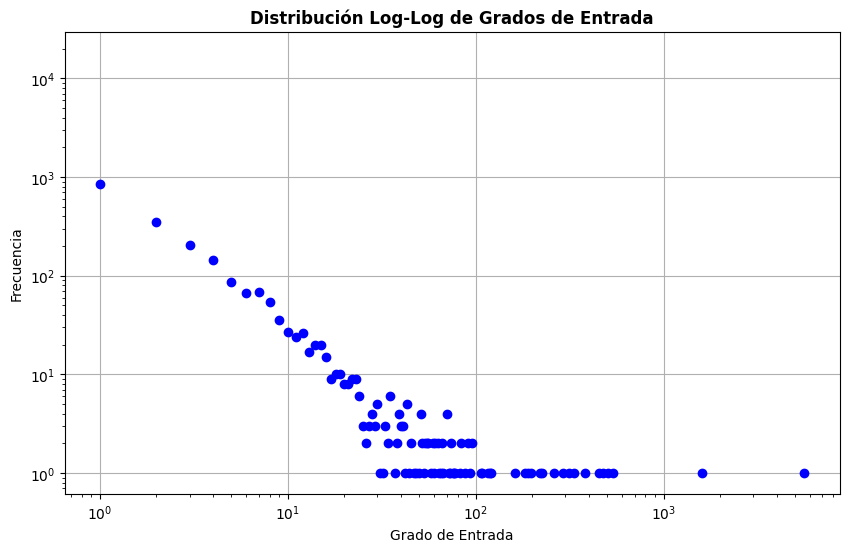

In [81]:

# # Crear el histograma logarítmico
# plt.figure(figsize=(10, 6))
# plt.hist(df_entradas['Entradas'], bins=np.logspace(np.log10(df_entradas['Entradas'].min()), np.log10(df_entradas['Entradas'].max()), 20))
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Grado de Entrada')
# plt.ylabel('Frecuencia')
# plt.title('Histograma Logarítmico de Grados de Entrada')
# plt.grid(True)
# plt.show()

# Contar las frecuencias de los grados de entrada
degree_counts = df_entradas['Entradas'].value_counts().sort_index()

# Crear la gráfica log-log
plt.figure(figsize=(10, 6))
plt.plot(degree_counts.index, degree_counts.values, 'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grado de Entrada')
plt.ylabel('Frecuencia')
plt.title('Distribución Log-Log de Grados de Entrada', fontweight='bold')
plt.grid(True)
plt.show()

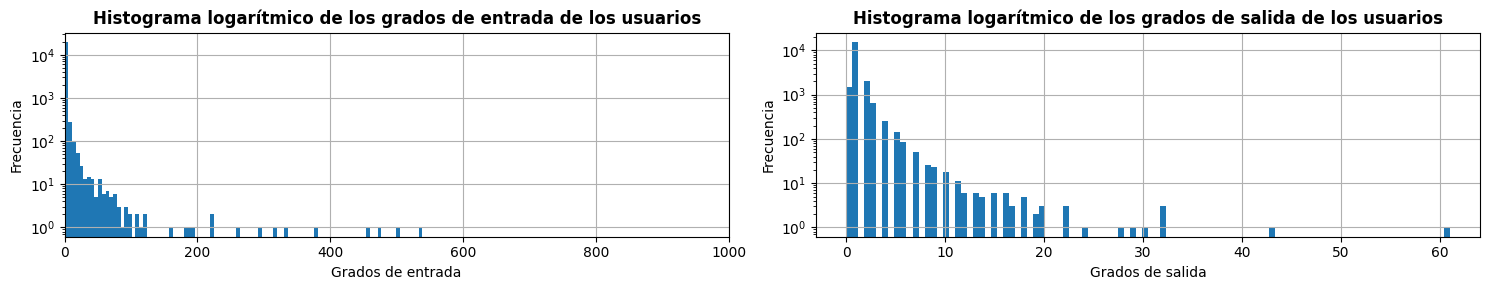

In [82]:
# Crear un lienzo con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(15,3))

# Histograma logarítmico de las entradas
axes[0].hist(df_entradas['Entradas'], bins=1000, log=True)
axes[0].set_title('Histograma logarítmico de los grados de entrada de los usuarios', fontweight='bold')
axes[0].set_xlabel('Grados de entrada')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlim(0, 1000)
axes[0].grid(True)

# Histograma logarítmico de las salidas
axes[1].hist(df_salidas['Salidas'], bins=100, log=True)
axes[1].set_title('Histograma logarítmico de los grados de salida de los usuarios', fontweight='bold')
axes[1].set_xlabel('Grados de salida')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


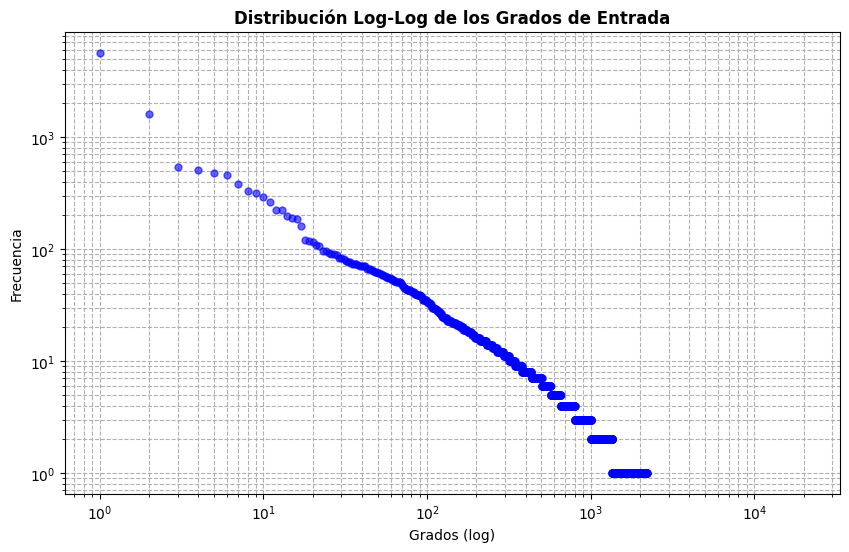

In [83]:
# LOG-LOG PLOT
# Extraer valores de grados de salida
entradas_values = df_entradas['Entradas'].values

# Ordenar los valores de grados de salida para el eje y
sorted_salidas = np.sort(entradas_values)[::-1]
ranks = np.arange(1, len(sorted_salidas) + 1)

# Crear el gráfico log-log
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_salidas, marker='o', linestyle='none', markersize=5, color='blue', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('Grados (log)')
plt.ylabel('Frecuencia')
plt.title('Distribución Log-Log de los Grados de Entrada', fontweight='bold')

# Mostrar el gráfico
plt.grid(True, which="both", ls="--")
plt.show()

In [84]:
# DENSIDAD

from IPython.display import Markdown

Markdown(str(nx.density(Gpeso)))

6.296441264692996e-05

Comparación entradas (retweets que le hacen) y salidas (retweets que hace)

In [85]:
merged_df = pd.merge(df_entradas, df_salidas, on='Username', how='outer').fillna(0)
merged_df.sort_values(by='Entradas', ascending=False, inplace=True)
merged_df.head(10)

,Username,Entradas,Salidas
17289,obscureSorrow_,5610,0
16395,marcomcs9,1609,0
4730,IrinaNathe,538,3
2222,CodexRex,503,0
16246,luukas1969,475,2
18205,rosarinhotavar1,455,1
19783,vovani4_khm,381,0
12764,butti_fabrizio,332,0
14936,infussambas,315,0
14728,hogrbe,293,0


In [86]:
merged_df[['Entradas', 'Salidas']].corr(method='spearman')

,Entradas,Salidas
Entradas,1.00000,-0.36055
Salidas,-0.36055,1.00000


## Degree Centrality
Mide la influencia de un nodo basada en el número de conexiones que tiene.

### In

In [87]:
in_degree_centrality = nx.in_degree_centrality(Gpeso)
in_degree_centrality = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)
df_in_degree_centrality = pd.DataFrame(in_degree_centrality, columns=['Username', 'In Degree Centrality'])
df_in_degree_centrality[df_in_degree_centrality['In Degree Centrality'] > 0].head(10)

,Username,In Degree Centrality
0,obscureSorrow_,0.277352
1,marcomcs9,0.079547
2,IrinaNathe,0.026598
3,CodexRex,0.024868
4,luukas1969,0.023483
5,rosarinhotavar1,0.022495
6,vovani4_khm,0.018836
7,butti_fabrizio,0.016414
8,infussambas,0.015573
9,hogrbe,0.014486


Out

In [88]:
out_degree_centrality = nx.out_degree_centrality(Gpeso)
out_degree_centrality = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)
df_out_degree_centrality = pd.DataFrame(out_degree_centrality, columns=['Username', 'Out Degree Centrality'])
df_out_degree_centrality[df_out_degree_centrality['Out Degree Centrality'] > 0].head(10)

,Username,Out Degree Centrality
0,DaGodfather59,0.003016
1,DevendraGanesh1,0.002126
2,MannJezza,0.001582
3,RodStephens4,0.001582
4,MawunyegaKojo,0.001582
5,JamesShallcros3,0.001483
6,davidwjohns1111,0.001434
7,BritishHKGov,0.001384
8,cmihai63,0.001187
9,DkKaloc,0.001088


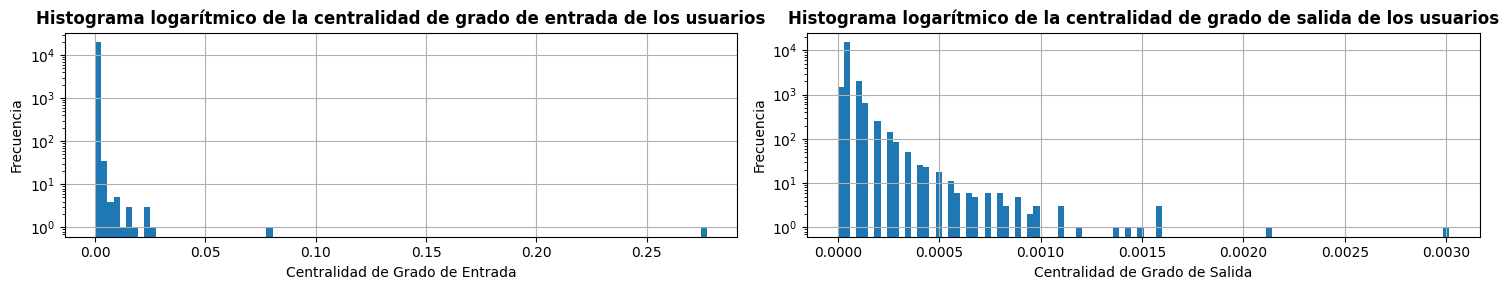

In [89]:
# Crear un lienzo con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(15,3))

# Histograma logarítmico de las entradas
axes[0].hist(df_in_degree_centrality['In Degree Centrality'], bins=100, log=True)
axes[0].set_title('Histograma logarítmico de la centralidad de grado de entrada de los usuarios', fontweight='bold')
axes[0].set_xlabel('Centralidad de Grado de Entrada')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Histograma logarítmico de las salidas
axes[1].hist(df_out_degree_centrality['Out Degree Centrality'], bins=100, log=True)
axes[1].set_title('Histograma logarítmico de la centralidad de grado de salida de los usuarios', fontweight='bold')
axes[1].set_xlabel('Centralidad de Grado de Salida')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


## Betweenness Centrality

Mide la cantidad de veces que un nodo actúa como un puente a lo largo del camino más corto entre dos otros nodos.

In [90]:
if Btw_activado:
    betweenness_centrality = nx.betweenness_centrality(Gpeso, weight='weight')
    betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df_betweenness_centrality = pd.DataFrame(betweenness_centrality, columns=['Username', 'Betweenness Centrality'])
    display(df_betweenness_centrality[df_betweenness_centrality['Betweenness Centrality'] > 0].head(10))

KeyboardInterrupt: 

In [ ]:
df_betweenness_centrality.head(10)

,Username,Betweenness Centrality
0,DaGodfather59,0.000696
1,BritishHKGov,0.000356
2,RodStephens4,0.000314
3,DkKaloc,0.000281
4,scott_podvin,0.000257
5,AnsisEgle,0.000195
6,benschaap1,0.000188
7,StinRek,0.000142
8,mitibataga,0.000141
9,EstrelaDANoite8,0.000139


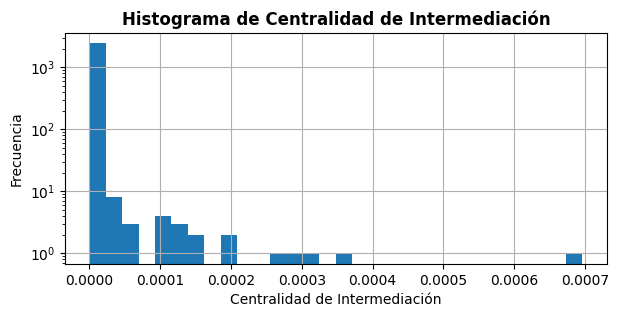

In [ ]:
if Btw_activado:
    df_betweenness_centrality.hist(column='Betweenness Centrality', bins=30, log=True, figsize=(7, 3)) 
    plt.title('Histograma de Centralidad de Intermediación', fontweight='bold')
    plt.xlabel('Centralidad de Intermediación')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show() 

## Closeness Centrality

Mide qué tan cerca está un nodo de todos los demás nodos en términos de distancia de camino más corto.

In [ ]:
closeness_centrality = nx.closeness_centrality(Gpeso)
closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
df_closeness_centrality = pd.DataFrame(closeness_centrality, columns=['Username', 'Closeness Centrality'])
df_closeness_centrality.head(10)

,Username,Closeness Centrality
0,obscureSorrow_,0.276405
1,Blsa17648789,0.038616
2,BlogUkraine,0.031961
3,malnacktl,0.029885
4,Rebel44CZ,0.028615
5,hunterghosts,0.024985
6,jmescoda,0.023784
7,DaGodfather59,0.023545
8,Michael83169843,0.023459
9,RussellEngland,0.022382


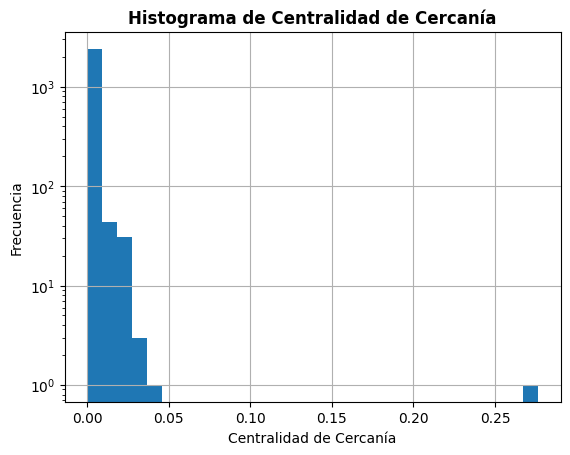

In [ ]:
df_closeness_centrality.hist(column='Closeness Centrality', bins=30, log=True)
plt.title('Histograma de Centralidad de Cercanía', fontweight='bold')
plt.xlabel('Centralidad de Cercanía')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Componentes conectados

In [ ]:
# # Aquí sacamos los componentes conectados, para ver la distribución de los tamaños
Gpeso_unidrected = Gpeso.to_undirected()
ccompo = list(nx.connected_components(Gpeso_unidrected))
len(ccompo)


len_ccompo = [len(x) for x in ccompo]
len_ccompo.sort(reverse=True)

pd.DataFrame(len_ccompo, columns=['Tamaño']).head(10)

# Eliminamos los nodos que perteenecen a los componentes que tenga menos de 5 nodos

# nodos_eliminar = [nodo for nodo in Gpeso_unidrected if not nodo in ccompo[0]]
# print(f'Nodos a eliminar: {len(nodos_eliminar)}')

# Gpeso.remove_nodes_from(nodos_eliminar)
# eliminar_nodos(nodos_eliminar)

NameError: name 'len_ccompo' is not defined

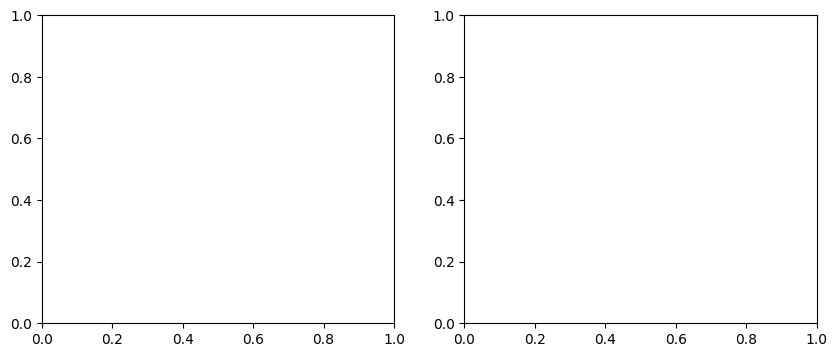

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Create a histogram
ax[0].hist(len_ccompo, bins=500)
# Add labels and title
ax[0].set_xlabel('Component Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of C.Components Lengths', fontweight='bold')


# Create a histogram
ax[1].hist(len_ccompo, bins=max(len_ccompo))
ax[1].set_xlim(0, 20)

# Add labels and title
ax[1].set_xlabel('Component Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of C.Components Lengths - Zoomed In', fontweight='bold')

# Set the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# # AQUÍ SACAMOS EL SUBGRAFO CONECTADO MÁS GRANDE
# scc = list(nx.strongly_connected_components(Gpeso))
# scc = sorted(scc, key=len, reverse=True)
# print(f'Número de SCC: {len(scc)}')
# largest_scc = (scc[0])
# print(f'Longitud del SCC más grande: {len(largest_scc)}')
# Gpeso_subgraph = Gpeso.subgraph(largest_scc).copy()

# # Dibujar el subgrafo
# pos = nx.spring_layout(Gpeso_subgraph)  # Elegir un layout
# plt.figure(figsize=(8, 6))
# nx.draw(Gpeso_subgraph, pos, with_labels=False, node_color='skyblue', edge_color='gray', node_size=400, font_size=10, font_color='black')
# plt.title('Componente Fuertemente Conectado Más Grande')
# plt.show()


# Eigenvector centrality

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(Gpeso)
df_eigenvector_centrality = pd.DataFrame(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True))
df_eigenvector_centrality.columns = ['Username', 'Eigenvector Centrality']

df_eigenvector_centrality.head(10)

,Username,Eigenvector Centrality
0,BlogUkraine,0.293131
1,DaGodfather59,0.279362
2,malnacktl,0.236479
3,RodStephens4,0.235272
4,scott_podvin,0.228828
5,StinRek,0.214153
6,DkKaloc,0.192316
7,BritishHKGov,0.177630
8,Cindy131967,0.176972
9,nichtweggucker,0.169162


In [ ]:
# Assuming Gpeso is the graph you want to calculate PageRank on
pagerank = nx.pagerank(Gpeso)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
df_PageRank_sorted = pd.DataFrame(sorted_pagerank, columns=['Username', 'PageRank'])
df_PageRank_sorted.head(10)

,Username,PageRank
0,obscureSorrow_,0.150762
1,Blsa17648789,0.017705
2,Rebel44CZ,0.015370
3,jmescoda,0.009643
4,hunterghosts,0.009388
5,BlogUkraine,0.008334
6,malnacktl,0.007407
7,owainkenway,0.006331
8,DaGodfather59,0.005214
9,I_Katchanovski,0.004902


# Comunidades

# Detectar comunidades

La mejor partición tiene una modularidad de 0.8402387484521843 y 231 comunidades.


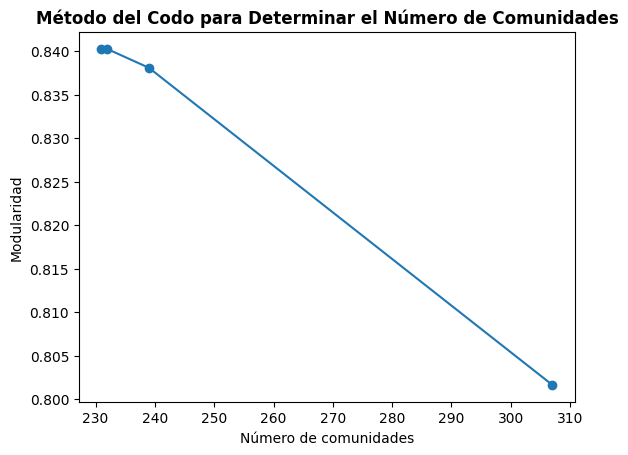

Datos enviados correctamente
Texto:
 "#Russia is Floundering BadlyIts War Efforts#Ukraine & is Paying STEEP Price as its War Machine Grindsa Halt after 6 months of Hard FightingUkraine #RussiaIsATerroristState #RussianWarCrimes #StopRussiaNOW #RussiaUkraineWar #UkraineWar "#Russia is Floundering BadlyIts War Efforts#Ukraine & is Paying STEEP Price as its War Machine Grindsa Halt after 6 months of Hard FightingUkraine #RussiaIsATerroristState #RussianWarCrimes #StopRussiaNOW #RussiaUkraineWar #UkraineWar "#Russia is Floundering BadlyIts War Efforts#Ukraine & is Paying STEEP Price as its War Machine Grindsa Halt after 6 months of Hard FightingUkraine #RussiaIsATerroristState #RussianWarCrimes #StopRussiaNOW #RussiaUkraineWar #UkraineWar "#Russia is Floundering BadlyIts War Efforts#Ukraine & is Paying STEEP Price as its War Machine Grindsa Halt after 6 months of Hard FightingUkraine #RussiaIsATerroristState #RussianWarCrimes #StopRussiaNOW #RussiaUkraineWar #UkraineWar "#Russia is Flounde

In [ ]:
import networkx as nx
import community as community_louvain
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import html
import re
Gpeso_nodirigido = Gpeso.to_undirected()
# Supongo que ya tienes Gpeso definido
# Gpeso = nx.read_weighted_edgelist('path_to_your_weighted_edge_list_file')

# Librería para procesar texto y limpiarlo
url_pattern = re.compile(r'https?://\S+|www\.\S+')
useless_words = ['in', 'the', 'on', 'at', 'to', '-', 'a']
useless_words = [' ' + word + ' ' for word in useless_words]
useless_characters = ['...', '..', '.', '\"']

# Función modificada de Louvain para registrar la modularidad en cada paso
def louvain_with_modularity_tracking(G):
    partition = community_louvain.generate_dendrogram(G, weight='weight')
    modularities = []
    num_communities = []
    best_partition = None
    best_modularity = -1

    for level in range(len(partition)):
        current_partition = community_louvain.partition_at_level(partition, level)
        modularity = community_louvain.modularity(current_partition, G)
        modularities.append(modularity)
        num_communities.append(len(set(current_partition.values())))

        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = current_partition

    return best_partition, best_modularity, modularities, num_communities

# Detectar comunidades y obtener modularidades en cada paso
best_partition, best_modularity, modularities, num_communities = louvain_with_modularity_tracking(Gpeso_nodirigido)

print(f'La mejor partición tiene una modularidad de {best_modularity} y {len(set(best_partition.values()))} comunidades.')

# Graficar modularidad vs número de comunidades
plt.plot(num_communities, modularities, marker='o')
plt.xlabel('Número de comunidades')
plt.ylabel('Modularidad')
plt.title('Método del Codo para Determinar el Número de Comunidades', fontweight='bold')
plt.show()

# Asignar las comunidades a los nodos
comunidad_dict = best_partition

# Asignar las comunidades a los nodos en Gephi (Suponiendo que 'update_node_attributes' es una función definida)
update_node_attributes(comunidad_dict.keys(), 'Comunidad', comunidad_dict.values())

# Crear un dataframe por cada comunidad
df_comunidades = pd.DataFrame(comunidad_dict.items(), columns=['Usuario', 'Comunidad'])

# Crear un diccionario con los usuarios de cada comunidad y los tweets
dict_comunidades = {}
for comunidad in df_comunidades['Comunidad'].unique():
    df_comunidad = df_comunidades[df_comunidades['Comunidad'] == comunidad]
    community_nodes = df_comunidad['Usuario'].tolist()
    tweets = df_tweets[df_tweets.index.isin(community_nodes)]['Tweet Content']
    text = ' '.join(tweets)

    # Limpiamos el encoding, urls y palabras inútiles
    text = html.unescape(text)
    text = url_pattern.sub('', text)
    text = re.sub(r'\s+', ' ', text)
    for word in useless_words: 
        text = text.replace(word, '')

    if comunidad == 2:
        print('Texto:\n', text)
    dict_comunidades[(comunidad)] = [len(community_nodes), community_nodes, text]

# Ordenar las comunidades según el número de nodos
dict_comunidades = dict(sorted(dict_comunidades.items(), key=lambda x: x[1][0], reverse=True))


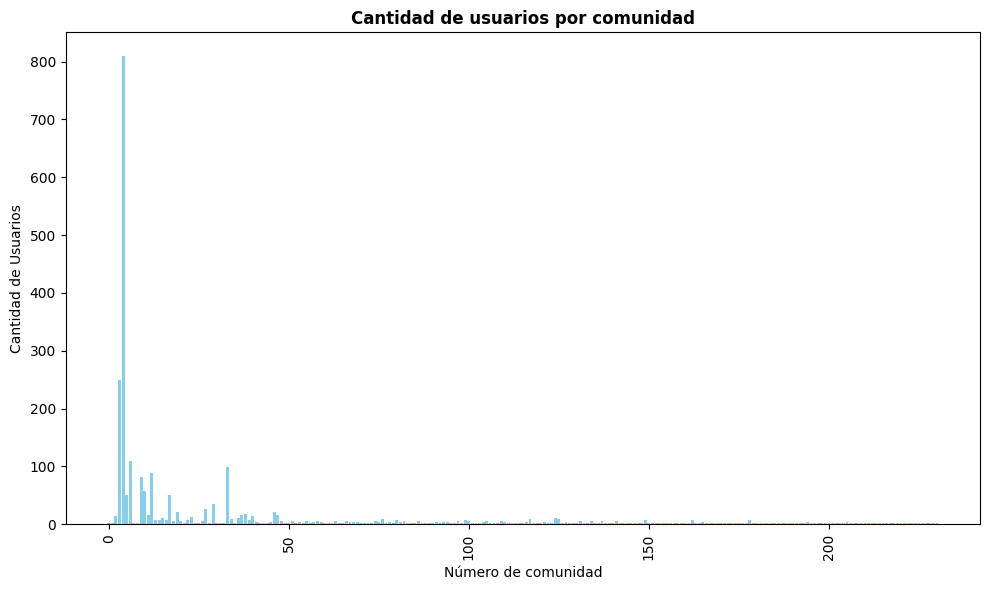

In [ ]:
# REALIZAMOS EL HISTOGRAMA DE LAS COMUNIDADES

# Extraer el número de usuarios por comunidad
comunidades = list(dict_comunidades.keys())
numero_usuarios = [dict_comunidades[comunidad][0] for comunidad in comunidades]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(comunidades, numero_usuarios, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Número de comunidad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de usuarios por comunidad', fontweight='bold')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si hay muchas comunidades

# Mostrar el histograma
plt.tight_layout()
plt.show()

# Interfaz Gráfica (GUI) con tkinter/customtkinter

255/255
Cantidad de combinaciones: 1
1/1
Lista: ['BlogUkraine', 'Blsa17648789', 'BritishHKGov', 'DaGodfather59', 'Rebel44CZ', 'RodStephens4', 'malnacktl', 'obscureSorrow_']
Mejor lista de usuarios: ['BlogUkraine', 'Blsa17648789', 'BritishHKGov', 'DaGodfather59', 'Rebel44CZ', 'RodStephens4', 'malnacktl', 'obscureSorrow_']
Nodos infectados: 312
Datos de primera vez:
Datos enviados correctamente
Datos de atributos (atributo, max, min y prob):
Datos enviados correctamente
Datos enviados correctamente
Datos enviados correctamente
Datos enviados correctamente
Datos enviados correctamente
A
['BlogUkraine', 'Blsa17648789', 'BritishHKGov', 'DaGodfather59', 'Rebel44CZ', 'RodStephens4', 'malnacktl', 'obscureSorrow_']


Nodos receptores del mensaje:

312 de 2487 (12.55%)


C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\customtkinter\windows\widgets\core_widget_classes\ctk_base_class.py:179: UserWarning: CTkLabel Warning: Given image is not CTkImage but <class 'PIL.ImageTk.PhotoImage'>. Image can not be scaled on HighDPI displays, use CTkImage instead.

  warnings.warn(f"{type(self).__name__} Warning: Given image is not CTkImage but {type(image)}. Image can not be scaled on HighDPI displays, use CTkImage instead.\n")


Comunidad 4:
810
Comunidad 3:
250
Comunidad 6:
109
Comunidad 33:
99
Comunidad 12:
88
Comunidad 9:
82


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20980\4043651660.py:603: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily_activity, ax=ax2, linewidth=2.5, marker='o', palette='tab10')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20980\4043651660.py:618: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunidad_geopandas['Tweet Posted Time'] = pd.to_datetime(df_comunidad_geopandas['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20980\4043651660.py:622: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

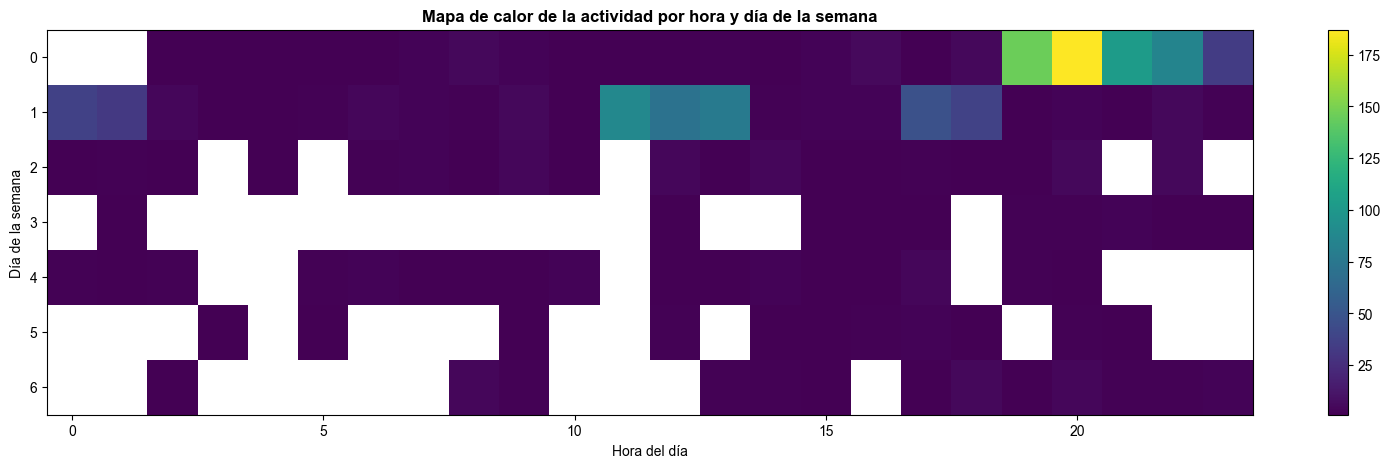

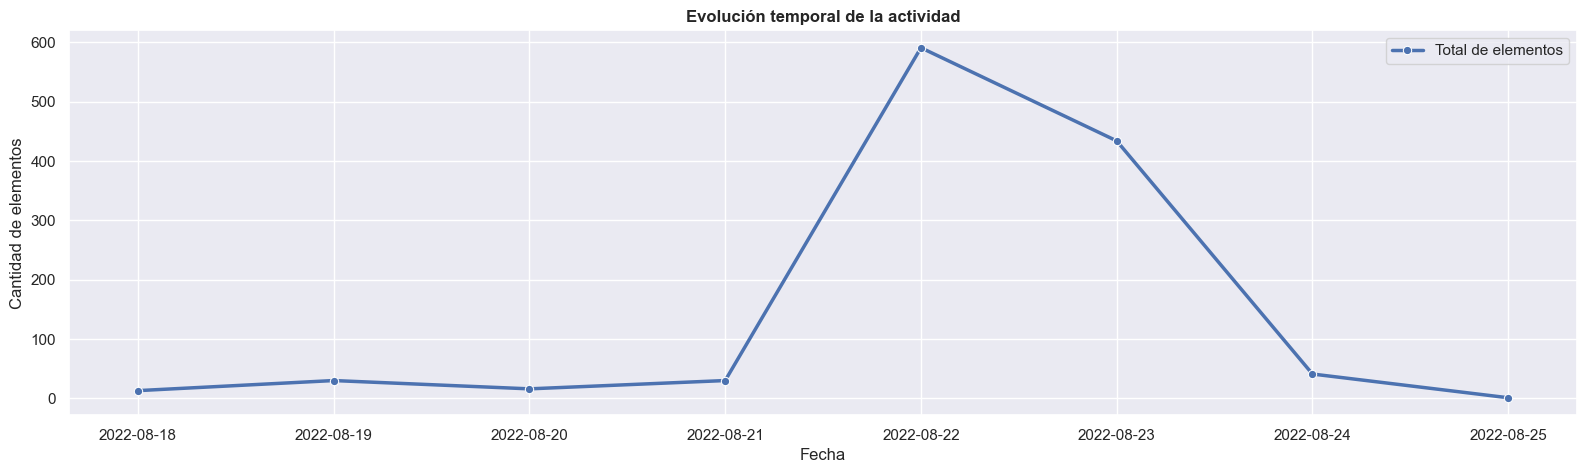

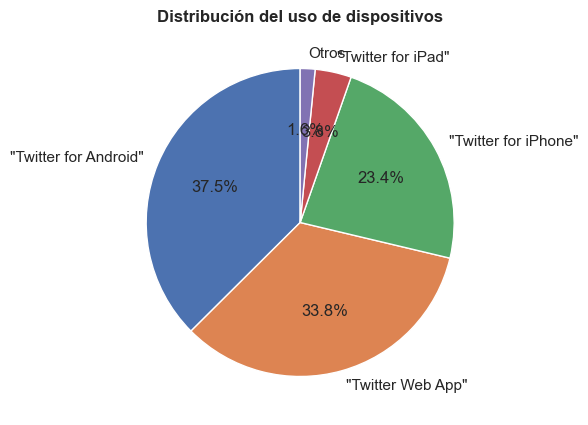

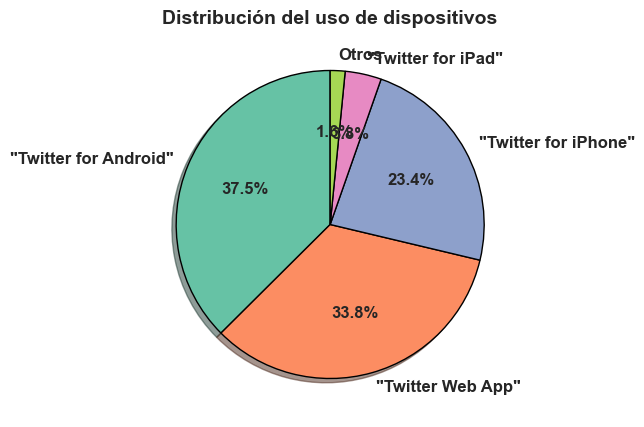

In [ ]:
# FUNCIONES
thread_1 = threading.Thread()
parar_thread = False
mejor_lista_users = []
mejor_nodos_infectados = 0

numero_intentos = 1000

# Función para calcular el precio total de una lista de nodos
def precio_lista_de_nodos(lista_nodos):
    precio = 0
    for nodo in lista_nodos:
        precio += Gpeso.in_degree()[nodo]
    return precio

# Función para encontrar todas las combinaciones de elementos con un precio total menor que el precio establecido
def todas_combinaciones(mi_lista, precio_establec):
    combinaciones_set = set()
    b = 0
    
    for r in range(1, len(mi_lista) + 1):
        combinaciones = itertools.combinations(mi_lista, r)
        for combinacion in combinaciones:
            if precio_lista_de_nodos(combinacion) <= precio_establec:
                combinaciones_set.add(tuple(sorted(combinacion)))
                b += 1
    
    # Convertimos las combinaciones de tuplas a listas
    combinaciones_list = [list(comb) for comb in combinaciones_set]
    print(f'Número de combinaciones: {len(combinaciones_list)}')
    combinaciones_finales = []
    combinaciones_set = set(tuple(sorted(comb)) for comb in combinaciones_list)

    act = 0
    max_act = len(combinaciones_set)
    for comb in combinaciones_set:
        act += 1
        clear_output(wait=True)
        print(f'{act}/{max_act}')
        es_unico = True
        for other_comb in combinaciones_set:
            if comb != other_comb and set(comb).issubset(set(other_comb)):
                es_unico = False
                break
        if es_unico:
            combinaciones_finales.append(list(comb))
    
    return combinaciones_finales



def actualizar_progreso(a, maximo):
        label_progreso.configure(text=f'{a}/{maximo}\n({round(a/maximo*100, 2)}%)')

# Función para encontrar la mejor lista de usuarios para maximizar el número de nodos infectados
def mejor_lista(G, lista_de_listas, nombre_atributo:str='mensaje'):
    global label_progreso



    # Variables para guardar la mejor lista de usuarios y el número de nodos infectados
    mejor_lista_users = []
    mejor_nodos_infectados = 0

    #Variables para llevar la cuenta de la iteración
    a = 0
    maximo = len(lista_de_listas)

    # Iteramos sobre todas las listas de usuarios
    for lista_users in lista_de_listas:
        if parar_thread == True:
            return 0, 0

        # Mostramos el progreso
        a += 1
        print(f'{a}/{maximo}\nLista: {lista_users}')

        # AQUI
        window.after(0, actualizar_progreso, a, maximo)

        # Difundir la información y contar el número de nodos infectados
        Gtemporal = diffuse_information(G, lista_users, nombre_atributo, first_time=True, num_intentos=numero_intentos, numero_prueba=0, weight_name='weight', reversed=True, send=False)
        nodos_infectados = sum([Gtemporal.nodes[node][nombre_atributo+'_max'] for node in Gtemporal.nodes])
        
        # Actualizar el número de nodos infectados si es mayor o igual que el mejor número de nodos infectados
        if nodos_infectados >= mejor_nodos_infectados:
            mejor_nodos_infectados = nodos_infectados
            mejor_lista_users = lista_users
        
    print(f'Mejor lista de usuarios: {mejor_lista_users}\nNodos infectados: {mejor_nodos_infectados}')
    return mejor_lista_users, mejor_nodos_infectados



def update_ui(mensaje_final):
    global comunidad_app2
    
    messagebox.showinfo(title='CONSEGUIDO', message=mensaje_final)
    comunidad_app2.cambiar_label(mensaje_final)

mensaje_final = ''
def threaaad(G, combinaciones_a_probar, nombre_atributo, tick_enviar_gephi_activado):
        global Gpeso, tick_enviar_gephi, mejor_lista_users, mejor_nodos_infectados, mensaje_final, parar_thread
        # Buscamos la mejor lista de usuarios para maximizar el número de nodos infectados
        mejor_lista_users, mejor_nodos_infectados = mejor_lista(G, combinaciones_a_probar, nombre_atributo=nombre_atributo)

        if mejor_lista_users == 0 or mejor_nodos_infectados == 0:
            messagebox.showerror(title='ADVERTENCIA', message='Se ha detenido el thread')
            parar_thread = False
            return

        if tick_enviar_gephi_activado == 1:
            # Actualizamos el grafo con la mejor lista de usuarios
            G = diffuse_information(G, mejor_lista_users, nombre_atributo, first_time=True, num_intentos=numero_intentos, numero_prueba=0, weight_name='weight', reversed=True, send=True)
            
            # Actualizamos los colores de los nodos
            update_node_attributes(list(G.nodes), 'color', ['#FF0000' if G.nodes[nodosc][nombre_atributo+'_max'] else '#000' for nodosc in G.nodes])
        
        else: # Si no queremos enviar a Gephi, actualizamos el grafo sin enviar
            G = diffuse_information(G, mejor_lista_users, nombre_atributo, first_time=True, num_intentos=1000, numero_prueba=0, weight_name='weight', reversed=True, send=False)

        print('A')
        mensaje_final = f'{mejor_lista_users}\n\n\nNodos receptores del mensaje:\n\n{mejor_nodos_infectados} de {len(G.nodes)} ({round(mejor_nodos_infectados/len(G.nodes)*100, 2)}%)'
        
        time.sleep(1)

        # Ejecutamos el código que interactúa con Tkinter en el hilo principal
        window.after(0, update_ui, mensaje_final)
        # AQUI

        Gpeso = G
        print(mensaje_final)

def msgbox_con_lista_usuarios_y_nodos_alcanzados():
    global thread_1
    # Comprobar si el hilo está en ejecución
    if thread_1 is not None:
        if thread_1.is_alive():
            messagebox.showerror(title='ADVERTENCIA', message='Ya hay una petición ejecutada. Por favor, espere a que termine o cancele la operación.')
            return
    
    print(f'{"---"*20}')
    global Gpeso, mensaje_final
    try:

        n_usuarios = int(n_usuarios_entry.get())
        precio_establecido = int(precio_establecido_entry.get())
        lista_metricas = []
        
        if in_degree_tick.get() == 1:
            print('in_degree_tick.get() == 1')
            lista_metricas.append(df_in_degree_centrality.head(n_usuarios))
        if closeness_tick.get() == 1:
            print('cls_tick.get() == 1')
            lista_metricas.append(df_closeness_centrality.head(n_usuarios))
        if eigenvector_tick.get() == 1:
            print('eign_degree_tick.get() == 1')
            lista_metricas.append(df_eigenvector_centrality.head(n_usuarios))
        if pagerank_tick.get() == 1:
            print('pagre_tick.get() == 1')
            lista_metricas.append(df_PageRank_sorted.head(n_usuarios))
        if betweenness_tick.get() == 1:
            print('btw_tick.get() == 1')
            lista_metricas.append(df_betweenness_centrality.head(n_usuarios))

        if len(lista_metricas) == 0:
            messagebox.showerror(title='ADVERTENCIA', message=f'Tienes que seleccionar al menos una métrica para continuar.\n')
            return

        # Sacamos los top usuarios de cada métrica y los unimos en una lista
        df_nombre_mejores_usuarios = pd.DataFrame(columns=['Username'])
        for metrica in lista_metricas:
            df_nombre_mejores_usuarios = pd.concat([df_nombre_mejores_usuarios, metrica['Username']]).reset_index(drop=True)
        lista_usuarios_mejores = df_nombre_mejores_usuarios['Username'].unique().tolist()
        

        if len(lista_usuarios_mejores) == 0:
            messagebox.showerror(title='ADVERTENCIA', message=f'No se han encontrado usuarios para combinar.\n')
            return
        if len(lista_usuarios_mejores) >= 10:
            if not messagebox.askokcancel(title='ADVERTENCIA', message=f'La lista de usuarios para combinar contiene {len(lista_usuarios_mejores)} elementos y puede tardar demasiado en cargar.\n¿Desea continuar con la operación?'):
                return
        
        print(f'{"-"*20}\nCantidad de usuarios para combinar: {len(lista_usuarios_mejores)}')

        # Sacamos todas las combinaciones posibles cuyo precio no supere el precio establecido
        combinaciones_a_probar = todas_combinaciones(lista_usuarios_mejores, precio_establecido)

        # Si no hay combinaciones posibles, lanzamos una excepción
        if len(combinaciones_a_probar) == 0:
            messagebox.showerror(title='ADVERTENCIA', message=f'No hay combinaciones posibles.\n{combinaciones_a_probar}')
            raise Exception('No hay combinaciones posibles')
        
        print(f'Cantidad de combinaciones: {len(combinaciones_a_probar)}')
        continuar = messagebox.askokcancel(title='ADVERTENCIA', message=f'Hay {len(combinaciones_a_probar)} combinaciones posibles.\n¿Desea continuar con la operación?')
        if continuar == False:
            return

        # Buscamos la mejor lista de usuarios para maximizar el número de nodos infectados
        # mejor_lista_users, mejor_nodos_infectados = mejor_lista(Gpeso, combinaciones_a_probar, nombre_atributo=nombre_atributo_entry.get())

        thread_1 = threading.Thread(target=threaaad, args=(Gpeso, combinaciones_a_probar, nombre_atributo_entry.get(), tick_enviar_gephi.get()))
        thread_1.start()

    
    except ValueError as e:
        messagebox.showerror("Error", f"Invalid input. Please enter integer values.{e}")
    except Exception as e:
        messagebox.showerror("Error", str(e))





###################################################################################################
###################################################################################################  Configuración inicial de la ventana
###################################################################################################
ctk.set_appearance_mode("dark")
ctk.set_default_color_theme("green")

window = ctk.CTk()
window.title("Retweet Network Analysis")
window.geometry("550x685")

################################################################################################### Crear un notebook
notebook = ttk.Notebook(window)
notebook.grid(row=0, column=0, columnspan=2, padx=20, pady=10)

#################################################################################                                     ###################################################################################################
################################################################################# Pestaña 1: Parámetros de simulación ###################################################################################################
#################################################################################                                     ###################################################################################################
tab_simulation = ctk.CTkFrame(notebook)
notebook.add(tab_simulation, text="Simulación")

info_dataframes = ctk.CTkLabel(tab_simulation, text="Seleccione los parámetros que desee:", font=("Helvetica", 14, "bold"))
info_dataframes.grid(row=0, column=0, padx=20, pady=10, sticky='w')

n_usuarios_label = ctk.CTkLabel(tab_simulation, text="Nº top usuarios/métrica:", font=("Helvetica", 14))
n_usuarios_label.grid(row=1, column=0, padx=20, pady=10, sticky='w')
n_usuarios_entry = ctk.CTkEntry(tab_simulation, font=("Helvetica", 14))
n_usuarios_entry.grid(row=1, column=1, padx=20, pady=10, sticky='w')
n_usuarios_entry.insert(0, '1')

precio_establecido_label = ctk.CTkLabel(tab_simulation, text="Presupuesto:", font=("Helvetica", 14))
precio_establecido_label.grid(row=2, column=0, padx=20, pady=10, sticky='w')
precio_establecido_entry = ctk.CTkEntry(tab_simulation, font=("Helvetica", 14))
precio_establecido_entry.grid(row=2, column=1, padx=20, pady=10, sticky='w')
precio_establecido_entry.insert(0, '10000')

nombre_atributo = ctk.CTkLabel(tab_simulation, text="Nombre del atributo:", font=("Helvetica", 14))
nombre_atributo.grid(row=3, column=0, padx=20, pady=10, sticky='w')
nombre_atributo_entry = ctk.CTkEntry(tab_simulation, font=("Helvetica", 14))
nombre_atributo_entry.grid(row=3, column=1, padx=20, pady=10, sticky='w')
nombre_atributo_entry.insert(0, 'mensaje')

tick_enviar_gephi = ctk.IntVar()
tick_enviar_gephi.set(1)
enviar_gephi_checkbox = ctk.CTkCheckBox(tab_simulation, text="Enviar a Gephi", variable=tick_enviar_gephi, font=("Helvetica", 14))
enviar_gephi_checkbox.grid(row=10, column=0, columnspan=2, padx=20, pady=10)

label_progreso = ctk.CTkLabel(tab_simulation, text="Progreso: --.--%", font=("Helvetica", 14))
label_progreso.grid(row=10, column=1, columnspan=2, padx=20, pady=10)

info_dataframes = ctk.CTkLabel(tab_simulation, text="Seleccione las métricas a tener en cuenta:", font=("Helvetica", 14, "bold"))
info_dataframes.grid(row=4, column=0, padx=20, pady=10, sticky='w')

# In degree       
in_degree_tick = ctk.IntVar()
in_degree_tick.set(1)
in_degree_checkbox = ctk.CTkCheckBox(tab_simulation, text="In Degree", variable=in_degree_tick, font=("Helvetica", 14))
in_degree_checkbox.grid(row=5, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Closeness centrality
closeness_tick = ctk.IntVar()
closeness_tick.set(1)
closeness_checkbox = ctk.CTkCheckBox(tab_simulation, text="Closeness Centrality", variable=closeness_tick, font=("Helvetica", 14))
closeness_checkbox.grid(row=6, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Eigenvector centrality
eigenvector_tick = ctk.IntVar()
eigenvector_tick.set(1)
eigenvector_checkbox = ctk.CTkCheckBox(tab_simulation, text="Eigenvector Centrality", variable=eigenvector_tick, font=("Helvetica", 14))
eigenvector_checkbox.grid(row=7, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# PageRank
pagerank_tick = ctk.IntVar()
pagerank_tick.set(1)
pagerank_checkbox = ctk.CTkCheckBox(tab_simulation, text="PageRank", variable=pagerank_tick, font=("Helvetica", 14))
pagerank_checkbox.grid(row=8, column=0, columnspan=2, padx=20, pady=10, sticky='w')

# Betweenness centrality
betweenness_tick = ctk.IntVar()
betweenness_tick.set(1)
betweenness_checkbox = ctk.CTkCheckBox(tab_simulation, text="Betweenness Centrality", variable=betweenness_tick, font=("Helvetica", 14))
betweenness_checkbox.grid(row=9, column=0, columnspan=2, padx=20, pady=10, sticky='w')


adjust_button = ctk.CTkButton(tab_simulation, text="Evaluar", command=msgbox_con_lista_usuarios_y_nodos_alcanzados, font=("Helvetica", 14))
adjust_button.grid(row=11, column=0, columnspan=2, padx=20, pady=10)

def parar_thread():
    global parar_thread
    parar_thread = True

adjust_button = ctk.CTkButton(tab_simulation, text="Parar", command=parar_thread, font=("Helvetica", 14))
adjust_button.grid(row=12, column=0, columnspan=2, padx=20, pady=10)

######################################################################################### Pestaña 2: Comunidades #####################################################################



######################################################################################### PESTAÑA RESULTADOS X COMUNIDAD ######################################################################################################
######################################################################################### PESTAÑA RESULTADOS X COMUNIDAD ######################################################################################################
######################################################################################### PESTAÑA RESULTADOS X COMUNIDAD ######################################################################################################
######################################################################################### PESTAÑA RESULTADOS X COMUNIDAD ######################################################################################################

tab_resultados = ctk.CTkFrame(notebook)
notebook.add(tab_resultados, text="Resultados-Comunidades")

# Crear un canvas dentro de la pestaña 2
canvas_resultados_comunidades = tk.Canvas(tab_resultados)
scrollbar2 = ttk.Scrollbar(tab_resultados, orient="vertical", command=canvas_resultados_comunidades.yview)
scrollable_frame2 = ctk.CTkFrame(canvas_resultados_comunidades)

scrollable_frame2.bind(
    "<Configure>",
    lambda e: canvas_resultados_comunidades.configure(
        scrollregion=canvas_resultados_comunidades.bbox("all")
    )
)

canvas_resultados_comunidades.create_window((0, 0), window=scrollable_frame2, anchor="nw")
canvas_resultados_comunidades.configure(yscrollcommand=scrollbar2.set)

canvas_resultados_comunidades.grid(row=0, column=0, sticky="nsew")
scrollbar2.grid(row=0, column=1, sticky="ns")

tab_resultados.grid_rowconfigure(0, weight=1)
tab_resultados.grid_columnconfigure(0, weight=1)

# Función para el desplazamiento con la rueda del ratón
def _on_mouse_wheel2(event):
    canvas_resultados_comunidades.yview_scroll(-1 * int(event.delta / 120), "units")


# Enlazar el evento de la rueda del ratón
canvas_resultados_comunidades.bind_all("<MouseWheel>", _on_mouse_wheel2)

# Enlazar el evento de la rueda del ratón al entrar y salir del canvas
canvas_resultados_comunidades.bind("<Enter>", lambda e: canvas_resultados_comunidades.bind_all("<MouseWheel>", _on_mouse_wheel2))
canvas_resultados_comunidades.bind("<Leave>", lambda e: canvas_resultados_comunidades.unbind_all("<MouseWheel>"))

class Resultados_A_Comunidades:
    def __init__(self, root):
        self.root = root
        self.frames = []  # Lista para mantener las referencias a los frames creados
        self.image_refs = []  # Lista para mantener las referencias a las imágenes generadas

        self.titulo_nodos = ctk.CTkLabel(root, text="Cuentas clave para enviar tu mensaje:", font=("Helvetica", 14), wraplength=150)
        self.titulo_nodos.grid(row=0, column=0, padx=175, pady=20)

        self.nodos_detectados = ctk.CTkLabel(root, text="--", font=("Helvetica", 14), wraplength=300)
        self.nodos_detectados.grid(row=1, column=0, padx=100, pady=20)

        self.confirmar_btn = ctk.CTkButton(root, text="Generar info", command=self.generar_info_comunidades, font=("Helvetica", 14))
        self.confirmar_btn.grid(row=2, column=0, padx=175, pady=20)
        
    def cambiar_label(self, texto):
        self.nodos_detectados.configure(text=texto)

    def generar_wordcloud(self, palabras):
        # Generar la imagen de Wordcloud
        wordcloud = WordCloud(width=600, height=200, background_color='white').generate(palabras)
        
        # Convertir la imagen de Wordcloud a formato compatible con Tkinter
        img_data = io.BytesIO()
        wordcloud.to_image().save(img_data, format='PNG')
        img_data.seek(0)
        
        # Crear una imagen PIL desde los datos en memoria
        pil_image = Image.open(img_data)
        
        # Convertir PIL Image a CTkImage si es posible
        try:
            photo_image = ctk.CTkImage(image=pil_image)  # Usar CTkImage si está definido en customtkinter
        except:
            photo_image = ImageTk.PhotoImage(pil_image)  # Usar ImageTk.PhotoImage como alternativa
        
        # Mantener una referencia a la imagen para evitar que sea recolectada por el recolector de basura
        self.image_refs.append(photo_image)
        
        return photo_image

    def generar_info_comunidades(self):
        # Limpiar frames anteriores y sus imágenes
        for frame in self.frames:
            frame.destroy()
        self.frames = []
        global mejor_lista_users

        if len(mejor_lista_users) == 0:
            messagebox.showerror(title='ADVERTENCIA', message='Primero simular la propagación de un mensaje para obtener la lista de usuarios.')
            return

        a = 2
        # AQUI FILTRAMOS EL DICT DE COMUNIDADES PARA QUE SOLO SALGAN LOS USUARIO DE LA LISTA DE MEJORES USUARIOS
        for n, (num_usuarios, usuarios, texto) in dict_comunidades.items():
            a+=1
            # Filtrar los usuarios de lista1 que pertenecen a la comunidad n
            usuarios_comunidad_n = [usuario for usuario in mejor_lista_users if usuario in usuarios]

            # Si no hay usuarios de la lista1 en la comunidad n, pasar a la siguiente comunidad
            if len(usuarios_comunidad_n) < 1:
                continue

            # messagebox.showinfo(title='CONSEGUIDO', message=f'Comunidad {n}:\n{usuarios_comunidad_n}')
            # Crear un nuevo diccionario con el nº de comunidad, nº de usuarios que y texto de la comunidad
            dict_comunidad_n = {n: (num_usuarios, usuarios_comunidad_n, texto)}

            frame = ctk.CTkFrame(self.root)
            frame.grid(row=a, column=0, padx=10, pady=10, sticky='ew')
            self.frames.append(frame)  # Agregar frame a la lista

            comunidad_label = ctk.CTkLabel(frame, text=f"\tCOMUNIDAD {n}", font=("Helvetica", 14, "bold"))
            comunidad_label.grid(row=0, column=0, sticky='w')

            # Convertir la lista de usuarios a una cadena separada por comas
            usuarios_str = ', '.join(usuarios_comunidad_n)

            componentes_label = ctk.CTkLabel(frame, text=f"\tComponentes: {len(usuarios_comunidad_n)}/{dict_comunidad_n[n][0]}:\n\n{usuarios_str}", font=("Helvetica", 14), wraplength=450)
            componentes_label.grid(row=1, column=0, sticky='w')

            # Generar y mostrar Wordcloud
            wordcloud_img = self.generar_wordcloud(dict_comunidad_n[n][2])
            label_wordcloud = ctk.CTkLabel(frame, image=wordcloud_img)
            label_wordcloud.image = wordcloud_img  # Mantener una referencia
            label_wordcloud.grid(row=2, column=0, pady=10)  # Usar grid en lugar de pack

        winsound.Beep(350, 500)


comunidad_app2 = Resultados_A_Comunidades(scrollable_frame2)


##############################################                              ##############################################
############################################## Pestaña con TOP COMUNIDADES  ##############################################
##############################################                              ##############################################

######################################################################################### Pestaña 4: Generar wordcloud ######################################################################################################
# Creamos una pestaña para la generación de nubes de palabras según las comunidades


tab_todas_comunidades = ctk.CTkFrame(notebook)
notebook.add(tab_todas_comunidades, text="Nubes de palabras por comunidad")

# Crear un canvas dentro de la pestaña 2
canvas_todas_comunidades = tk.Canvas(tab_todas_comunidades)
scrollable_todas_comunidades = ttk.Scrollbar(tab_todas_comunidades, orient="vertical", command=canvas_todas_comunidades.yview)
scrollable_todas_comunidades_frame2 = ctk.CTkFrame(canvas_todas_comunidades)

scrollable_todas_comunidades_frame2.bind(
    "<Configure>",
    lambda e: canvas_todas_comunidades.configure(
        scrollregion=canvas_todas_comunidades.bbox("all")
    )
)

canvas_todas_comunidades.create_window((0, 0), window=scrollable_todas_comunidades_frame2, anchor="nw")
canvas_todas_comunidades.configure(yscrollcommand=scrollable_todas_comunidades.set)

canvas_todas_comunidades.grid(row=0, column=0, sticky="nsew")
scrollable_todas_comunidades.grid(row=0, column=1, sticky="ns")

tab_todas_comunidades.grid_rowconfigure(0, weight=1)
tab_todas_comunidades.grid_columnconfigure(0, weight=1)

# Función para el desplazamiento con la rueda del ratón
def _on_mouse_wheel(event):
    canvas_todas_comunidades.yview_scroll(-1 * int(event.delta / 120), "units")

# Enlazar el evento de la rueda del ratón
canvas_todas_comunidades.bind_all("<MouseWheel>", _on_mouse_wheel)

# Enlazar el evento de la rueda del ratón al entrar y salir del canvas
canvas_todas_comunidades.bind("<Enter>", lambda e: canvas_todas_comunidades.bind_all("<MouseWheel>", _on_mouse_wheel))
canvas_todas_comunidades.bind("<Leave>", lambda e: canvas_todas_comunidades.unbind_all("<MouseWheel>"))

######################################################################################### ABRIR NUEVA VENTANA ######################################################################################################
class Ver_Propiedades_de_Comunidad:
    


    def __init__(self, lista_users, ncom):
        self.root = tk.Tk()
        self.root.title(f"Detalles de la comunidad {ncom}")
        self.root.geometry("1200x800")  # Tamaño inicial de la ventana

        # Maximizar la ventana en Windows
        self.root.state('zoomed')
        
        self.lista_users = lista_users
        self.ncom = ncom

        self.main_frame = tk.Frame(self.root)
        self.main_frame.pack(fill=tk.BOTH, expand=tk.YES)
        
        self.canvas = tk.Canvas(self.main_frame)
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=tk.YES)

        
        self.scrollbar = ttk.Scrollbar(self.main_frame, orient=tk.VERTICAL, command=self.canvas.yview)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        self.canvas.configure(yscrollcommand=self.scrollbar.set)
        
        self.canvas.bind('<Configure>', lambda e: self.canvas.configure(scrollregion=self.canvas.bbox('all')))
        
        self.second_frame = tk.Frame(self.canvas)
        
        self.canvas.create_window((0, 0), window=self.second_frame, anchor=tk.NW)
        
        self.create_widgets()


    # Función para limpiar el campo de ubicación
    def clean_location(self, location):
        cleaned_location = re.sub(r'"([^"]+)( \1)?"', r'\1', location)
        return cleaned_location.strip()
    
    
    # Función para geocodificar una ubicación
    def geocode_location(self, location):
        
        # Inicializar el geocodificador
        geolocator = Nominatim(user_agent="geoapiExercises")

        try:
            time.sleep(1)  # Pausa para evitar sobrecargar el servicio de geocodificación
            location = geolocator.geocode(location)
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except:
            return None, None
        
    def create_widgets(self):
        # Crear un widget ScrolledText para mostrar la lista de usuarios
        usuarios_text = scrolledtext.ScrolledText(self.second_frame, wrap=tk.WORD, font=("Helvetica", 16), width=160, height=10)
        usuarios_text.pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)

        # Insertar el texto en el widget ScrolledText
        usuarios_text.insert(tk.END, f"Usuarios de la comunidad {self.ncom}:\n\n{', '.join(self.lista_users)}")

        # Hacer el widget de solo lectura
        usuarios_text.config(state=tk.DISABLED)


###################################################################################################     # Gráficos 
###################################################################################################

        tamano_figuras = (7,5)
        ### FILTROS DF ##
        # Filtrar el dataframe de tweets para obtener solo los usuarios de la comunidad n
        df_comunidad = df[df['Username'].isin(self.lista_users)]

        if len(df_comunidad) < 1:
            messagebox.showerror(title='ADVERTENCIA', message='No se han encontrado usuarios para la comunidad seleccionada.')
            return



###################################################################################################        # MAPA DE CALOR
        # Construir el mapa de calor
        heatmap_data = df_comunidad.groupby(['DayOfWeek', 'Hour']).size().unstack()

        fig1, ax1 = plt.subplots(figsize=tamano_figuras)
        im = ax1.imshow(heatmap_data, cmap='viridis', aspect='auto')
        ax1.set_title('Mapa de calor de la actividad por hora y día de la semana', fontweight='bold')
        ax1.set_xlabel('Hora del día')
        ax1.set_ylabel('Día de la semana')
        fig1.colorbar(im, ax=ax1)

###################################################################################################        # ACTIVIDAD DIARIA
        # Construir el gráfico de actividad diaria
        daily_activity = df_comunidad.groupby('Date').size()

        # fig2, ax2 = plt.subplots(figsize=tamano_figuras)
        # ax2.plot(daily_activity, label='Total de Tweets')
        # ax2.set_title('Evolución temporal de la actividad', fontweight='bold')
        # ax2.set_xlabel('Fecha')
        # ax2.set_ylabel('Cantidad de Elementos')
        # # ax2.set_xticks(rotation=45)
        # ax2.legend()

        # Configurar el estilo de Seaborn
        sns.set_theme(style="darkgrid")

        # Crear la figura y el eje
        fig2, ax2 = plt.subplots(figsize=tamano_figuras)

        # Utilizar Seaborn para trazar el gráfico de línea
        sns.lineplot(data=daily_activity, ax=ax2, linewidth=2.5, marker='o', palette='tab10')

        # Configuración adicional del gráfico
        ax2.set_title('Evolución temporal de la actividad', fontweight='bold')
        ax2.set_xlabel('Fecha')
        ax2.set_ylabel('Cantidad de elementos')
        ax2.legend(labels=['Total de elementos'], loc='best')


###################################################################################################       # GEOPANDAS

        df_comunidad_geopandas = df_comunidad[df_comunidad['Tweet Location']!="\"\""]
        geo_df = ''
        if len(df_comunidad_geopandas) > 1:
            # Convertir 'Tweet Posted Time' a datetime
            df_comunidad_geopandas['Tweet Posted Time'] = pd.to_datetime(df_comunidad_geopandas['Tweet Posted Time'], format='%d %b %Y %H:%M:%S')


            # Aplicar la función a la columna de ubicación
            df_comunidad_geopandas['Cleaned Location'] = df_comunidad_geopandas['Tweet Location'].apply(self.clean_location)



            # Aplicar la función a la columna de ubicación
            df_comunidad_geopandas['Latitude'], df_comunidad_geopandas['Longitude'] = zip(*df_comunidad_geopandas['Cleaned Location'].apply(self.geocode_location))

            # Filtrar tweets con coordenadas válidas
            geo_df = df_comunidad_geopandas.dropna(subset=['Latitude', 'Longitude'])

            if len(geo_df) > 1:

                # Geopandas
                # Crear un GeoDataFrame
                gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df['Longitude'], geo_df['Latitude']))

                # Cargar un mapa base
                world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

                # Graficar los datos
                fig3, ax3 = plt.subplots(figsize=tamano_figuras)
                world.boundary.plot(ax=ax3)
                gdf.plot(ax=ax3, color='red', marker='o', markersize=200)
                ax3.set_title('Distribución geográfica de los tweets', fontweight='bold')
            


###################################################################################################       # COMPARACIÓN DE ACTIVIDAD
        # Filtrar por usuarios verificados y no verificados
        # verified_df = df_comunidad[df_comunidad['Verified or Non-Verified'] == 'Verified']
        # non_verified_df = df_comunidad[df_comunidad['Verified or Non-Verified'] == 'Non-Verified']

        # if len(verified_df) > 1 or len(non_verified_df) > 1:

        #     # Agrupar por tipo de tweet
        #     verified_activity = verified_df.groupby('Tweet Type').size()
        #     non_verified_activity = non_verified_df.groupby('Tweet Type').size()

        #     # Combinar los resultados en un DataFrame
        #     activity_comparison = pd.DataFrame({'Verified': verified_activity, 'Non-Verified': non_verified_activity})

        #     # Plotear la comparación en subplots
        #     fig4, ax4 = plt.subplots(figsize=tamano_figuras)
        #     activity_comparison.plot(kind='bar', ax=ax4, rot=0)
        #     ax4.set_title('Comparación de actividad entre usuarios verificados y no verificados', fontweight='bold')
        #     ax4.set_xlabel('Tipo de Tweet')
        #     ax4.set_ylabel('Cantidad')
        #     ax4.autoscale(tight=True)


###################################################################################################       # USO DE DISPOSITIVOS
        # Contar la cantidad de tweets por tipo de dispositivo
        device_usage = df_comunidad['Client'].value_counts()

        # Seleccionar solo los dispositivos principales y agrupar los demás como 'Otros'
        # Establecemos el threshold en el valor que tenga el sexto dispositivo más usado
        threshold = device_usage.iloc[3]

        top_devices = device_usage[device_usage >= threshold]
        other_devices_count = device_usage[device_usage < threshold].sum()
        top_devices['Otros'] = other_devices_count

        # Crear un gráfico de pie
        fig5, ax5 = plt.subplots(figsize=tamano_figuras)
        ax5.pie(top_devices, labels=top_devices.index, autopct='%1.1f%%', startangle=90)
        ax5.set_title('Distribución del uso de dispositivos', fontweight='bold')

        # Configurar el estilo de Seaborn (opcional pero recomendado para mejorar la estética)
        sns.set_theme(style="whitegrid")

        # Crear un gráfico de pie más estilizado y legible
        fig5, ax5 = plt.subplots(figsize=tamano_figuras)
        colors = sns.color_palette('Set2')  # Usar una paleta de colores de Seaborn

        # Graficar el pie con colores personalizados y sombra
        wedges, texts, autotexts = ax5.pie(top_devices, labels=top_devices.index, autopct='%1.1f%%', 
                                        startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
                                        shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})

        # Añadir título y ajustes adicionales
        ax5.set_title('Distribución del uso de dispositivos', fontweight='bold', fontsize=14)


        # Embed Matplotlib figures in Tkinter
        canvas1 = FigureCanvasTkAgg(fig1, master=self.second_frame)
        canvas1.get_tk_widget().pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)
        
        canvas2 = FigureCanvasTkAgg(fig2, master=self.second_frame)
        canvas2.get_tk_widget().pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)

        
        if len(geo_df) > 1:
            canvas3 = FigureCanvasTkAgg(fig3, master=self.second_frame)
            canvas3.get_tk_widget().pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)

        # if len(verified_df) > 1 or len(non_verified_df) > 1:
        #     canvas4 = FigureCanvasTkAgg(fig4, master=self.second_frame)
        #     canvas4.get_tk_widget().pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)

        canvas5 = FigureCanvasTkAgg(fig5, master=self.second_frame)
        canvas5.get_tk_widget().pack(side=tk.TOP, padx=10, pady=10, fill=tk.BOTH, expand=True)

    def run(self):
        self.root.mainloop()


class TodasComunidadesApp:
    def __init__(self, root):
        self.root = root
        self.frames = []  # Lista para mantener las referencias a los frames creados
        self.image_refs = []  # Lista para mantener las referencias a las imágenes generadas

        self.root.grid_rowconfigure(0, weight=1)

        # Crear un entry para elegir el nº de comunidades que quiere mostrar
        self.n_comunidades_label = ctk.CTkLabel(root, text="Nº de comunidades:", font=("Helvetica", 14))
        self.n_comunidades_label.grid(row=0, column=0, padx=180, pady=10)
        self.n_comunidades_entry = ctk.CTkEntry(root, font=("Helvetica", 14))
        self.n_comunidades_entry.grid(row=1, column=0, padx=180, pady=10)
        self.n_comunidades_entry.insert(0, '5')

        self.confirmar_btn = ctk.CTkButton(root, text="Generar info", command=self.generar_info_comunidades, font=("Helvetica", 14))
        self.confirmar_btn.grid(row=2, column=0, padx=180, pady=10)

    # Función para limpiar el campo de ubicación
    def clean_location(self, location):
        cleaned_location = re.sub(r'"([^"]+)( \1)?"', r'\1', location)
        return cleaned_location.strip()


    # Función para geocodificar una ubicación
    def geocode_location(self, location):

        # Inicializar el geocodificador
        geolocator = Nominatim(user_agent="geoapiExercises")

        try:
            time.sleep(1)  # Pausa para evitar sobrecargar el servicio de geocodificación
            location = geolocator.geocode(location)
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except:
            return None, None
    


    def generate_new_window(self, ncom, lista_users):
        appp = Ver_Propiedades_de_Comunidad(lista_users, ncom)
        appp.run()
        return




    def generar_wordcloud(self, palabras):
        # Generar la imagen de Wordcloud
        wordcloud = WordCloud(width=600, height=200, background_color='white').generate(palabras)
        
        # Convertir la imagen de Wordcloud a formato compatible con Tkinter
        img_data = io.BytesIO()
        wordcloud.to_image().save(img_data, format='PNG')
        img_data.seek(0)
        
        # Crear una imagen PIL desde los datos en memoria
        pil_image = Image.open(img_data)
        
        # Convertir PIL Image a CTkImage si es posible
        try:
            photo_image = ImageTk.PhotoImage(pil_image)  # Usar ImageTk.PhotoImage como alternativa
        except:
            photo_image = ctk.CTkImage(image=pil_image)  # Usar CTkImage si está definido en customtkinter
        
        # Mantener una referencia a la imagen para evitar que sea recolectada por el recolector de basura
        self.image_refs.append(photo_image)
        
        return photo_image

    def generar_info_comunidades(self):
        # Limpiar frames anteriores y sus imágenes
        for frame in self.frames:
            frame.destroy()
        self.frames = []
        
        roww = 2
        a = 0
        max_comunidades = int(self.n_comunidades_entry.get())
        # # Creamos un nuevo dict que sea el de comunidades pero ordenado por nº de usuarios
        # dict_comunidades_sorted = dict(sorted(dict_comunidades.items(), key=lambda x: x[1][0], reverse=True))
        
        for n, (num_usuarios, usuarios, texto) in dict_comunidades.items():
            print(f'Comunidad {n}:\n{num_usuarios}')
            a+=1
            roww+=1
            if a > max_comunidades:
                break

            # Si no hay usuarios de la lista1 en la comunidad n, pasar a la siguiente comunidad
            if len(usuarios) < 1:
                continue


            frame = ctk.CTkFrame(self.root)
            frame.grid(row=roww, column=0, padx=10, pady=10, sticky='ew')
            
            frame.grid_rowconfigure(2, weight=1)
            self.frames.append(frame)  # Agregar frame a la lista

            comunidad_label = ctk.CTkLabel(frame, text=f"\tCOMUNIDAD {n}", font=("Helvetica", 14, "bold"))
            comunidad_label.grid(row=0, column=0, sticky='w')


            componentes_label = ctk.CTkLabel(frame, text=f"\t{num_usuarios} usuarios:", font=("Helvetica", 14))
            componentes_label.grid(row=1, column=0, sticky='w')

            if texto == '' or len(texto) < 1:
                texto = 'NO_TWEETS_AVAILABLE'
            # Generar y mostrar Wordcloud
            wordcloud_img = self.generar_wordcloud(texto)
            time.sleep(0.5)
            label_wordcloud = ctk.CTkLabel(frame, image=wordcloud_img)
            label_wordcloud.image = wordcloud_img  # Mantener una referencia
            label_wordcloud.grid(row=2, column=0, pady=10)  # Usar grid en lugar de pack

            # Botón para abrir una nueva ventana con los usuarios de la comunidad
            open_window_btn = ctk.CTkButton(frame, text=f"Ver usuarios", command=lambda n=n, usuarios=usuarios: self.generate_new_window(n, usuarios), font=("Helvetica", 14))
            open_window_btn.grid(row=3, column=0, pady=10)

        winsound.Beep(350, 500)


todas_comunidad_app = TodasComunidadesApp(scrollable_todas_comunidades_frame2)

# Ejecutar el bucle de eventos de tkinter
window.mainloop()